In [1]:
from moddipic.core.pipeline import Pipeline, OutputBlock
from moddipic.core.data import Ligand, SMILESRep

# try:
from rdkit import Chem
from moddipic.modules.rdkit.representations import RDKitMolRep
from moddipic.modules.rdkit import (
    RDKitTautEnumerator, RDKitLigandHAdder, RDKitLigandEmbedder
)
RDKIT_SUCCESSFUL_IMPORT = True
# except: 
#     RDKIT_SUCCESSFUL_IMPORT = False

In [25]:
class Pipeline1(Pipeline):
    name = "pipeline1"
    def build(self):
        self.add_block(RDKitTautEnumerator(flatten=True), "tau_enum")
        self.add_block(RDKitLigandHAdder(), "h_adder")
        self.add_block(RDKitLigandEmbedder(), "lig_embedder")
        self.add_block(OutputBlock(["ligands"]), "output")
        self.add_connection("tau_enum", "ligands", "h_adder", "ligands")
        self.add_connection("h_adder", "ligands", "lig_embedder", "ligands")
        self.add_connection("lig_embedder", "ligands", "output", "ligands")

smi_rep = SMILESRep("CCC(=O)CCc1ccccc1")
pipeline = Pipeline1()

In [26]:
 o = pipeline.execute(ligands=Ligand(smi_rep))


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
>>                STARTED: pipeline1                 >>
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

[Running Pipe Block: (tau_enum) RDKIT Tautomer Enumerator]


100%|██████████| 1/1 [00:00<00:00, 191.54it/s]



[Running Pipe Block: (h_adder) RDKit Hydrogen Adder]
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>


100%|██████████| 3/3 [00:00<00:00, 5785.25it/s]



[Running Pipe Block: (lig_embedder) RDKit Ligand Embedder]
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>
<class 'moddipic.core.data.special_cls.Ligand'> <class 'moddipic.core.data.special_cls.Ligand'>


100%|██████████| 3/3 [00:00<00:00, 51.85it/s]


[Running Pipe Block: (output) Output Block]

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
<<                 ENDED: pipeline1                  <<
<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


In [44]:
assert subprocess.run(
    ["mopac", "test.mop"], capture_output=True).stderr.decode().strip() == \
        """MOPAC input data-set file: "test" does not exist."""
from moddipic.modules.mopac.representations import MOPACInputMolRep
from moddipic.modules.mopac import (
    MOPACLigandSinglePointCalculator, MOPACLigandOptimizer,
    MOPACConfig, MOPACMozymeConfig
)

class Pipeline2(Pipeline):
    name = "pipeline2"
    def build(self):
        self.add_block(Pipeline1(base_dir=".", debug=True), 
                        "3der")
        config_sp = MOPACConfig()
        self.add_block(
            MOPACLigandSinglePointCalculator(config_sp, debug=True), "sp1")
        self.add_block(OutputBlock(["energy"]), "output")
        self.add_connection("3der", "ligands", "sp1", "ligands")
        self.add_connection("sp1", "energy", "output", "energy")


In [45]:
pipeline = Pipeline2()
pipeline.execute(ligands=Ligand(smi_rep))

AssertionError: 

In [43]:
MOPACLigandSinglePointCalculator.output_keys

['energy', 'out_path']

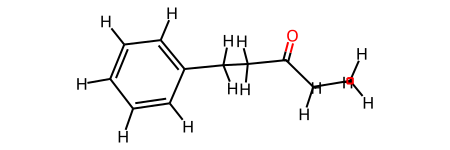

In [29]:
o["ligands"][0].get_data(RDKitMolRep)

In [41]:
import subprocess
subprocess.run(["mopac", "test.mop"], capture_output=True).stderr.decode().strip()

'MOPAC input data-set file: "test" does not exist.'